# LOW PASS FILTERING

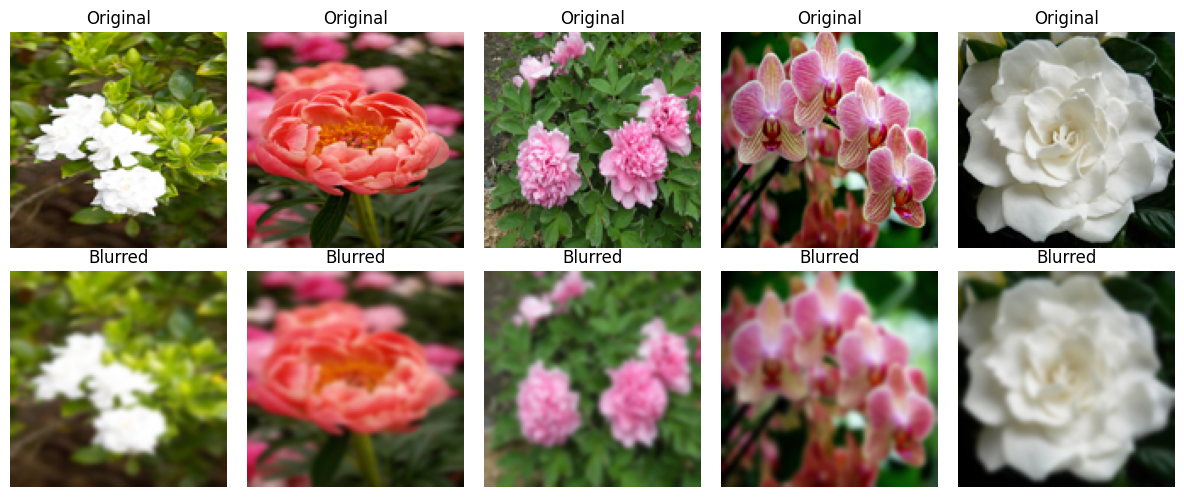

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import numpy as np

image_dir = '/kaggle/input/flower-image-dataset/flowers'

# Get list of image paths
image_paths = glob(os.path.join(image_dir, '*.jpg'))

# Load first 5 images
sample_images = []
for path in image_paths[:5]:
    img = Image.open(path).convert('RGB')       # Load image
    img = img.resize((128, 128))                # Resize
    img_np = np.array(img)                      # Convert to NumPy
    sample_images.append(img_np)    # Converting to a NumPy array (so you can process with OpenCV)

# Apply Gaussian blur
blurred_images = [cv2.GaussianBlur(img, (7, 7), 0) for img in sample_images]

# Display original vs blurred
plt.figure(figsize=(12, 5))
for i in range(5):
    # Original
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title("Original")
    plt.axis('off')

    # Blurred
    plt.subplot(2, 5, i + 6)
    plt.imshow(blurred_images[i])
    plt.title("Blurred")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Noise Reduction

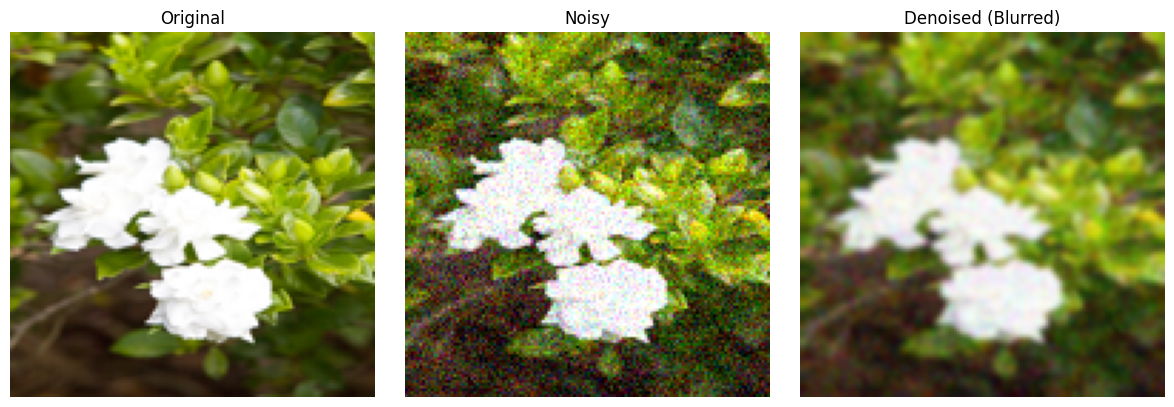

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from glob import glob

# Load one flower image
image_path = glob('/kaggle/input/flower-image-dataset/flowers/*.jpg')[0]
img = Image.open(image_path).convert('RGB')
img = img.resize((128, 128))
img_np = np.array(img).astype(np.float32)

# Add Gaussian noise
noise = np.random.normal(0, 25, img_np.shape)  # mean=0, std=25
noisy_img = img_np + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Apply Gaussian blur (low-pass filter)
denoised_img = cv2.GaussianBlur(noisy_img, (5, 5), 0)

# Show all images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_np.astype(np.uint8))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img)
plt.title("Noisy")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_img)
plt.title("Denoised (Blurred)")
plt.axis('off')

plt.tight_layout()
plt.show()
